# Unit 5 - Financial Planning

In [118]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
%matplotlib inline

In [77]:
# Load .env enviroment variables
load_dotenv()

True

In [78]:
api_key = os.getenv("NASDAQ_API_KEY")
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [79]:
api = tradeapi.REST(
    api_key,
    alpaca_api_key,
    api_version = "v2"
)

In [80]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version ="v2"
)

In [81]:
alpaca

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [82]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [83]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [84]:
# Fetch current BTC price
# YOUR CODE HERE!

# Fetch current ETH price
# YOUR CODE HERE!

# Compute current value of my crpto
# YOUR CODE HERE!

# Print current crypto wallet balance
btc_response = requests.get(btc_url).json()
btc_price = btc_response['data']['1']['quotes']['USD']['price']
eth_response = requests.get(eth_url).json()
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
print(f'The current value of your {my_btc} BTC is ${my_btc_value:0.2f}')
print(f'The current value of your {my_eth} ETH is ${my_eth_value:0.2f}')

The current value of your 1.2 BTC is $28116.00
The current value of your 5.3 ETH is $8817.24


In [85]:
# Fetch current BTC price
# YOUR CODE HERE!

# Fetch current ETH price
# YOUR CODE HERE!

# Compute current value of my crpto
# YOUR CODE HERE!

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $28116.00
The current value of your 5.3 ETH is $8817.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [86]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [87]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
api_key = os.getenv("NASDAQ_API_KEY")
alpaca_api_key = os.getenv("ALPACA_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version ="v2"
)

In [88]:
# Format current date as ISO format
# YOUR CODE HERE!
start_date = pd.Timestamp("2023-01-26", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-26", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)
AGG = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
ticker_data = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])
# Preview DataFrame
# YOUR CODE HERE!
ticker_data.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2023-01-26 05:00:00+00:00  403.13  404.92  400.03  404.75  72307597   

                                                      AGG                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2023-01-26 05:00:00+00:00      521730  402.612043  100.33  100.46  100.07   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2023-01-26 05:00:00+00:00  100.23  5399100       27372  100.278729

In [92]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(ticker_data["AGG"]["close"]) 
spy_close_price = float(ticker_data["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $100.23
Current SPY closing price: $404.75


In [93]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy 
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20237.50
The current value of your 200 AGG shares is $20046.00


36933.239

### Savings Health Analysis

In [103]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
total_share_value = my_spy_value + my_agg_value
total_crypto_value = my_btc_value + my_eth_value

# Create savings DataFrame
# YOUR CODE HERE!
data = {'amount':[total_crypto_value, total_crypto_value ]}

df_savings = pd.DataFrame(data, index=['crypto', 'shares'])

# Display savings DataFrame
print(df_savings)

           amount
crypto  36933.239
shares  36933.239


<AxesSubplot:title={'center':'Asset Portfolio Composition'}, ylabel='amount'>

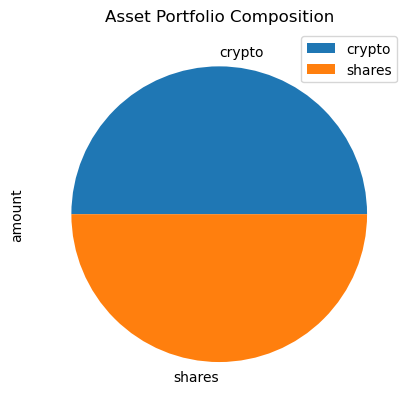

In [105]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount", title="Asset Portfolio Composition")


In [109]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto_value + total_share_value

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congrats! You have enough money yay!")

elif total_savings == emergency_fund:
    print("You hit the goal")

else:
    amount_away = emergency_fund - total_savings
    print("you are {} dollars away from the fund goal.")

Congrats! You have enough money yay!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [113]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

1Day


In [117]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1

).df
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = df_stock_data[df_stock_data["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([SPY, AGG], axis=1, keys = ["SPY", "AGG"] )
# Display sample data
df_stock_data.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967

In [121]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
np.random.seed(1)

MC_thirtyyears = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [122]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirtyyears.portfolio_data.tail()

SPY                                      \
                             open    high       low   close    volume   
timestamp                                                               
2021-04-26 04:00:00+00:00  417.44  418.22  416.8111  417.61  51824860   
2021-04-27 04:00:00+00:00  417.93  418.14  416.3000  417.52  50297139   
2021-04-28 04:00:00+00:00  417.81  419.01  416.9000  417.40  50692781   
2021-04-29 04:00:00+00:00  420.32  420.72  416.4400  420.06  76965583   
2021-04-30 04:00:00+00:00  417.63  418.54  416.3400  417.30  84731942   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2021-04-26 04:00:00+00:00      295870  417.508245     0.002088  114.74   
2021-04-27 04:00:00+00:00      296300  417.481360    -0.000216  115.13   
2021-04-28 04:00:00+00:00      330049  417.742098    -0.000287  114.45   
2021-04-29 04:00:00+00:00      443396  418.824046     0.006373  114.14   
2021-04-30 04:00:00+00:00      478844  417.651995    -0.006570  114.41   

                                                                          \
                               high     low   close   volume trade_count   
timestamp                                                                  
2021-04-26 04:00:00+00:00  114.8015  114.65  114.65  3480303       13520   
2021-04-27 04:00:00+00:00  115.1300  114.37  114.37  3820640       12720   
2021-04-28 04:00:00+00:00  114.4685  114.20  114.43  7075831       24303   
2021-04-29 04:00:00+00:00  114.3700  114.09  114.37  6208142       21096   
2021-04-30 04:00:00+00:00  114.5150  114.33  114.49  6469432       19582   

                                                    
                                 vwap daily_return  
timestamp                                           
2021-04-26 04:00:00+00:00  114.706244    -0.000871  
2021-04-27 04:00:00+00:00  114.498315    -0.002442  
2021-04-28 04:00:00+00:00  114.379810     0.000525  
2021-04-29 04:00:00+00:00  114.250702    -0.000524  
2021-04-30 04:00:00+00:00  114.456246     0.001049

In [123]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirtyyears.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/nidalsinan/Desktop/Fintech/Module_5_HW/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012428,1.005946,1.009927,0.997955,0.985190,1.011482,1.007932,0.997655,1.006324,0.999273,...,0.994540,1.004203,0.996076,1.014856,0.998674,0.998015,0.996735,0.999454,1.000161,1.003213
2,1.009632,1.011344,1.003243,0.987208,0.986703,1.012484,1.001414,0.998632,0.996536,1.000799,...,0.990013,1.013556,0.997190,1.018974,1.005074,0.994189,1.001449,1.009505,1.007696,1.011728
3,1.007865,1.011225,0.998735,0.986507,0.997192,1.018897,1.000734,0.997649,0.998582,1.001427,...,0.989299,1.021105,0.998675,1.038214,1.000865,0.992892,0.995727,1.012560,1.011871,1.014884
4,1.001223,1.020189,0.989956,0.990810,1.004155,1.022135,1.020364,0.995235,0.993771,1.003731,...,0.994213,1.019369,1.002822,1.039082,0.986285,0.989848,0.982599,1.007322,1.009947,1.000394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,22.438797,11.452782,56.433559,9.323685,6.874690,24.377262,41.076542,9.699174,46.994392,11.177521,...,13.065200,15.332038,26.616493,4.236155,7.788274,37.425991,13.338797,6.907877,3.042057,10.430177
7557,22.338983,11.492943,56.319252,9.339179,6.888736,24.038861,41.429637,9.546343,46.633198,11.294706,...,13.343081,15.370404,26.701994,4.253614,7.766729,37.654161,13.337292,6.920459,3.024859,10.511063
7558,22.347156,11.494350,55.995735,9.305402,6.866153,23.994402,41.679880,9.561297,46.628962,11.435291,...,13.213534,15.182160,26.819389,4.253656,7.844361,37.939127,13.147506,6.983937,3.007409,10.440531
7559,22.186820,11.632989,56.412677,9.063233,6.924800,24.026493,42.326648,9.729769,46.898060,11.435947,...,13.227967,15.309498,26.537589,4.253468,7.744677,38.347798,13.023481,6.993488,2.993174,10.438117


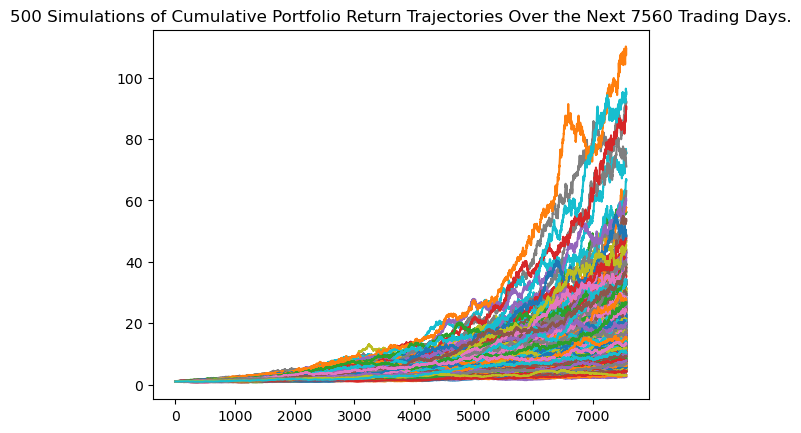

In [125]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirtyyears.plot_simulation()
line_plot.get_figure().savefig("MC_thirtyyears.png", bbox_inches="tight")

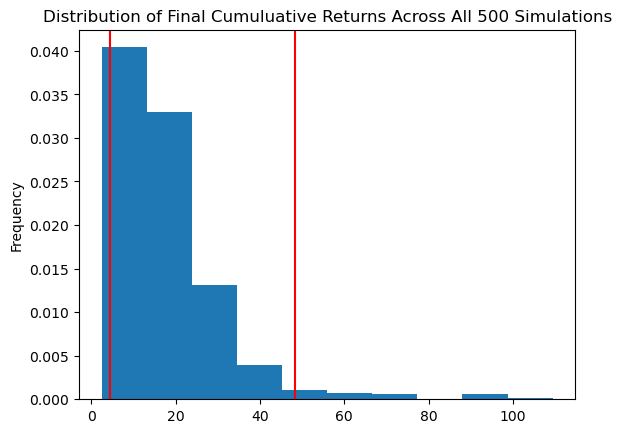

In [126]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirtyyears.plot_distribution()
dist_plot.get_figure().savefig('MC_thirtyyears.png',bbox_inches='tight')

### Retirement Analysis

In [127]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirtyyears.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             18.062068
std              12.953152
min               2.466084
25%              10.242755
50%              14.619850
75%              21.960896
max             109.376639
95% CI Lower      4.505404
95% CI Upper     48.208847
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [128]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $90108.08 and $964176.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [129]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $135162.12 and $1446265.42


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")